# Simple Linear Regression


In [7]:
from warnings import filterwarnings
filterwarnings("ignore")


## Step 1 Read Dataset

In [8]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### I want understand Relationship between RND and PROFIT


#### PROFIT ~ RND

#### PROFIT_PRED =BO + B1 *RND
#### X= RND, Y=PROFIT

In [9]:
X = df[["RND"]]
Y= df[["PROFIT"]]


In [10]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [11]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [13]:
import seaborn as sns 
sns.scatterplot(data =df, x="RND", y="PROFIT")

ModuleNotFoundError: No module named 'seaborn'

### Step 3- Perform Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model =LinearRegression()
model.fit(X,Y) 

LinearRegression()

### Get Slope and intercept

In [ ]:
model.intercept_

array([49032.89914125])

In [ ]:
model.coef_

array([[0.85429137]])

#### profit_pred = 49032.9 + 0,8543*RND

#### Regression Plot

<Axes: xlabel='RND', ylabel='PROFIT'>

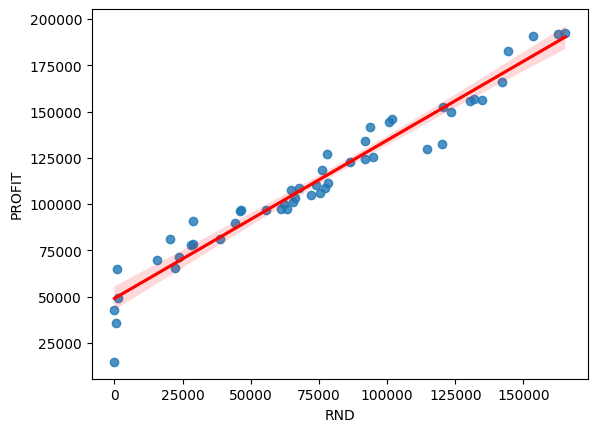

In [ ]:
sns.regplot(data = df, x="RND", y ="PROFIT",line_kws={"color":"red"})

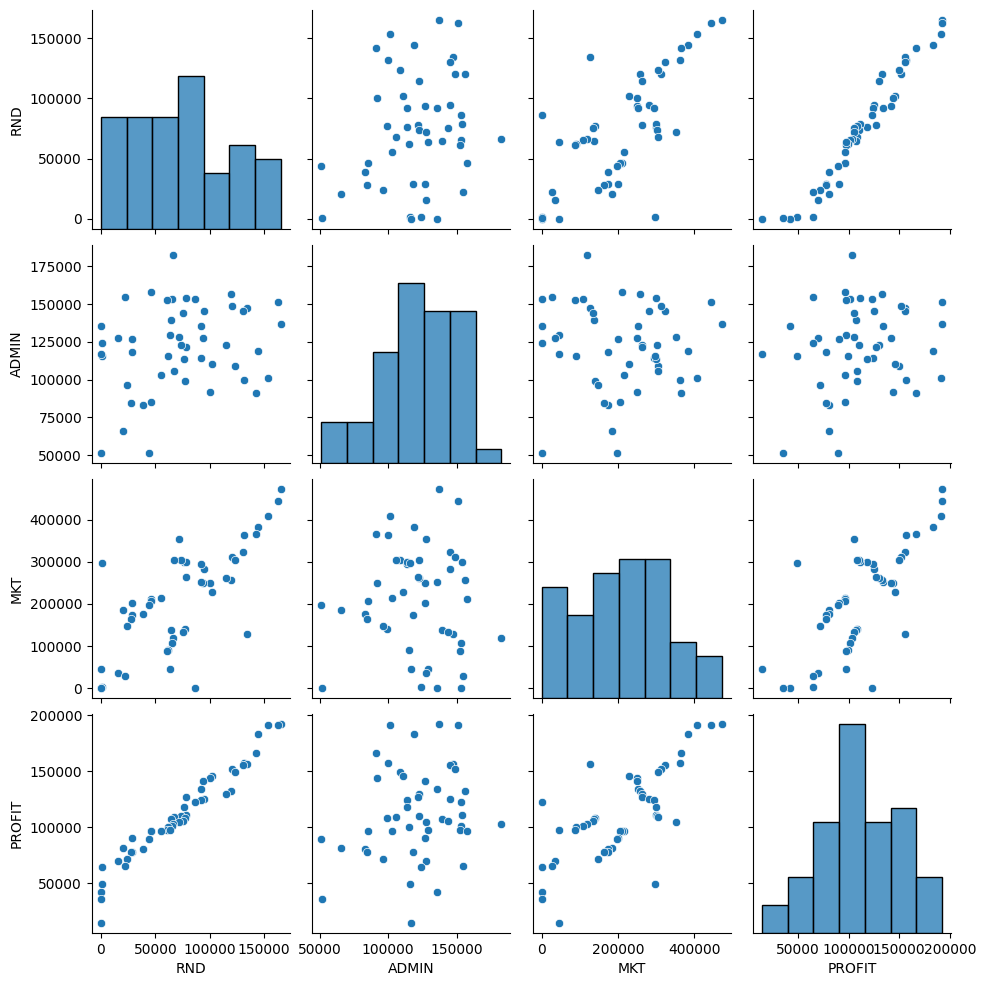

In [ ]:
sns.pairplot(data=df)

In [ ]:
ypred =model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [ ]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Model Evaluation 

##### 1.Root Mean Squared Error (std error)
##### 2.Mean Absolute Error
##### 3.Mean Absolute Percentage error
##### 4. R2 Score

In [ ]:
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)


In [ ]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")


In [ ]:
evaluate_model(model, X,Y)

MSE : 85120931.33
RMSE : 9226.10
MAE : 6910.98
MAPE : 0.1107
R2 Score : 0.9465


### From above r2 score is 0.9465 > 0.8 hence it is a good model and can be used for out of sample predictions

#### out of sample Prediction 

In [ ]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [ ]:
rnd =[[1_55_000]]
model.predict(rnd)

array([[181448.06163677]])

#### Profit_pred = 49032.9 + 0.8543*RND

In [ ]:
49032.9+ 0.8543 * 155000 

181449.4

### if RND increases by 1 unit profit will increase by 0.8543

### if RND increase by 1000 ,Profit will increase  by 854.3